2.      Загрузить датасет, подготовить датасет, выполнить исследование и отбор признаков. Обучить алгоритм SVM,. Выполнить прогноз на проверочных данных. Выполнить прогноз на проверочных данных. Снять метрики и ошибки модели. Написать выводы.

Датасет: 13_credit_approve.rar
Датасет содержит данные об одобрении или отказе в выдаче кредита клиентам.
целевая переменная А16 - “+\-”

1. Title: Japanese Credit Screening (examples & domain theory)

2. Source information:
   -- Creators: Chiharu Sano 
   -- Donor: Chiharu Sano
             csano@bonnie.ICS.UCI.EDU
   -- Date: 3/19/92

3. Past usage: 
   -- None Published

4. Relevant information:
   --  Examples represent positive and negative instances of people who were and were not 
       granted credit.
   --  The theory was generated by talking to the individuals at a Japanese company that grants
       credit.

5. Number of instances: 125


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

8.  Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

9.  Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)



In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

%matplotlib inline

In [2]:
df = pd.read_csv('crx.data', names = ['A' + str(col) for col in range(1,17)], 
                 
                 na_values = '?') # per dataset description, there are NA values marked by '?'

In [3]:
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    float64
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    float64
 14  A15     653 non-null    int64  
 15  A16     653 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.7+ KB


In [6]:
def my_fact(d,x,y):
    if d==x:
        return -1
    elif d==y:
        return 1
    else:
        raise ValueError(f'{x} or {y} expected')

In [7]:
df.A1 = df.A1.apply(my_fact, args=('a','b'))
df.A9 = df.A9.apply(my_fact, args=('f','t'))
df.A10 = df.A10.apply(my_fact, args=('f','t'))
df.A12 = df.A12.apply(my_fact, args=('f','t'))
df.A16 = df.A16.apply(my_fact, args=('-','+'))

df.A4,_ = df.A4.factorize()
df.A5,_ = df.A5.factorize()
df.A6,_ = df.A6.factorize()
df.A7,_ = df.A7.factorize()
df.A13,_ = df.A13.factorize()

In [8]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,0,0,0,0,1.25,1,1,1,-1,0,202.0,0,1
1,-1,58.67,4.460,0,0,1,1,3.04,1,1,6,-1,0,43.0,560,1
2,-1,24.50,0.500,0,0,1,1,1.50,1,-1,0,-1,0,280.0,824,1
3,1,27.83,1.540,0,0,0,0,3.75,1,1,5,1,0,100.0,3,1
4,1,20.17,5.625,0,0,0,0,1.71,1,-1,0,-1,1,120.0,0,1


In [9]:
df.corrwith(df['A16']).abs().sort_values()

A1     0.019817
A7     0.039695
A12    0.050011
A14    0.085217
A13    0.092817
A4     0.154074
A5     0.154074
A15    0.172766
A2     0.180252
A6     0.189923
A3     0.207086
A8     0.332728
A11    0.406052
A10    0.451866
A9     0.738829
A16    1.000000
dtype: float64

In [10]:
feat_svc = [
    'A9'
    #,'A10'
    #,'A11'
    #,'A8'
    #,'A3'
    #,'A6'
    #,'A2'
    #,'A15'
    #,'A5'
]

# Adding more features to the analysis won't improve the result!

In [11]:
X = df[feat_svc].copy()
y = df.A16.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_test)

print('LinearSVC:\n')
print('score =',lsvc.score(X_test, y_test),'\n')
print(confusion_matrix(y_test, y_pred_lsvc),'\n\n')

svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = lsvc.predict(X_test)

print('SVC:\n')
print('score =',svc.score(X_test, y_test), '\n')
print(confusion_matrix(y_test, y_pred_svc),'\n\n')

LinearSVC:

score = 0.8931297709923665 

[[60 11]
 [ 3 57]] 


SVC:

score = 0.8931297709923665 

[[60 11]
 [ 3 57]] 




In [12]:
pred_prob = dict()
fpr = dict()
tpr = dict()
clr = dict()
mod = dict()

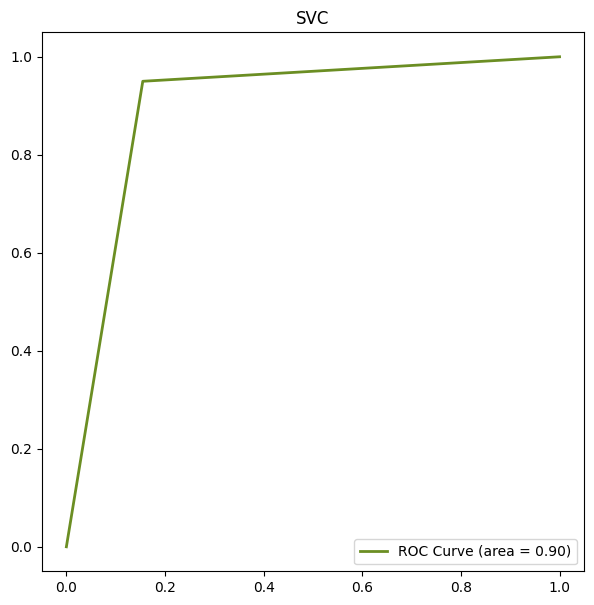

In [13]:
ind = 'svc'

pred_prob[ind] = svc.predict_proba(X_test)
fpr[ind], tpr[ind], _ = roc_curve(y_test, pred_prob[ind][:,1])

clr[ind] = 'olivedrab'
mod[ind] = 'SVC'

roc_auc = auc(fpr[ind], tpr[ind])
plt.figure(figsize=(7,7))

plt.plot(fpr[ind], tpr[ind], color=clr[ind], lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.title(mod[ind])
plt.show()